#*CLASSIFICAZIONE OGGETTI E PERSONE*



In questo script viene usata una rete **CNN - CONVOLUTION NEURAL NETWORK** , con lo scopo di classificare le immagini del dataset-civiltà-contadina. Cercando di restituire la classe di appartenenza degli oggetti o persone che abbiamo nell'immagine. Si

1.   Voce elenco
2.   Voce elenco

preleva ad esempio un immagine 86.JPG e si fa la classificazione swing: 51.25%, shovel: 7.47%
e hook: 6.06%. La predizione è di bassa qualità perche mancano alcuni accorgimenti:
- data argomentation
- pre-addestramento
- nessuna ottimizazzione nella scelta del numero delle epoche
- nessun cross-validatione dei dati di input

Funzioni utilizzate:
- ***load_images_from_directory()*** : carico le immagini della directory, non c'è nessun tipo di processamento delle immagini
- ***load_and_preprocess_image()*** : carica correttamente le immagini nel formato giusto
- ***classify_and_move_image()***: classifica le immagini, cioè fa la predizione e le sposta nelle cartella OGGETTO se è un oggetto, PEAPLE se è classificato come persona
- ***display_predictions()*** : visualizziamo risultato


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive//MyDrive/

 Audio		     CNN-CLASSIFICAZIONE	 DOCUMENTI_POP_OS  'RIVISTA HACKING'
 BIG_DATA_PROGETTO  'Colab Notebooks'		 GIAPPONE	    tuo_dataset
 Capo		     ComputerVision		'Manutenzione '
 CAPODANNO2024	     dataset-civiltà-contadina	 NATALE2023


In [ ]:
!ls /content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie2

120.JPG  147.JPG  153.JPG  155.JPG  193.JPG  194.JPG  197.JPG  198.JPG	_Anteprima.jpg


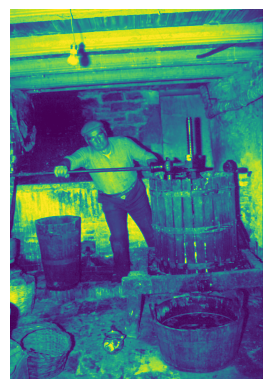

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Percorso dell'immagine
img_path = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG'

# Caricare e visualizzare l'immagine
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Nascondere gli assi
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definizione del modello
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 classi: Persona e Oggetto
])

# Compilazione del modello
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- CNN - modello della rete
- default - dataset per addestramento
- Test - dataset-civiltà-contadina

In [ ]:
!pip install pycocotools opencv-python-headless

In [ ]:
!ls /content/drive//MyDrive/dataset-civiltà-contadina/COCODatasetPerson

README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
train_images_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train'
valid_images_dir= '/content/drive//MyDrive/dataset-civiltà-contadina/COCODatasetPerson/test'

In [ ]:
import os

train_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train'
valid_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/valid'

for root, dirs, files in os.walk(train_images_dir):
    print(root)
    for name in files:
        print(os.path.join(root, name))


/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000055903_jpg.rf.5ea1ef5163463f550356e307317e2799.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000373198_jpg.rf.a6e5c2eabebf3d2d36accab765aa8a79.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000202004_jpg.rf.bf45eb065176f25c305b805727b45286.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000319615_jpg.rf.1af6102cd1dfb82b247e8edd4bf5f006.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000419265_jpg.rf.05ef29c42006dd8cc3b94236a081d500.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000269975_jpg.rf.d2588d18be0dc1465957a63b39576108.jpg
/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train/000000071499_jpg.rf.afb3f7e39f38bb78c4038daacd989660.jpg
/content/

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Funzione per caricare le immagini da una directory
def load_images_from_directory(directory, target_size=(224, 224)):
    images = []
    for root, _, files in os.walk(directory):
        for name in files:
            if name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, name)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size)
                img_array = np.array(img)
                images.append(img_array)
    return np.array(images)

# Percorsi delle directory
train_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/train'
valid_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/COCODatasetPerson/valid'

# Carica le immagini
train_images = load_images_from_directory(train_images_dir)
valid_images = load_images_from_directory(valid_images_dir)

# Creazione di etichette fittizie
train_labels = np.zeros((train_images.shape[0],), dtype=int)  # tutte le etichette a 0
valid_labels = np.zeros((valid_images.shape[0],), dtype=int)  # tutte le etichette a 0


In [ ]:
train_labels

array([0, 0, 0, ..., 0, 0, 0])

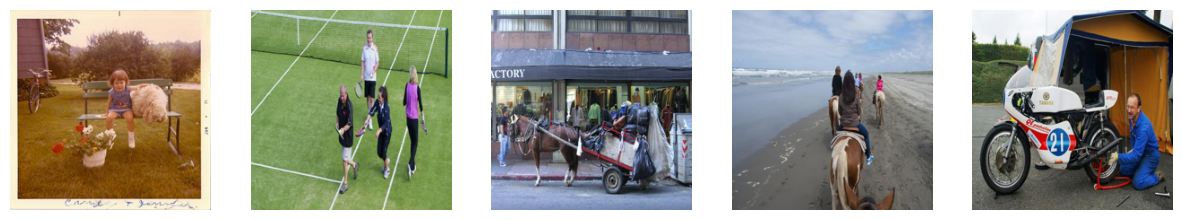

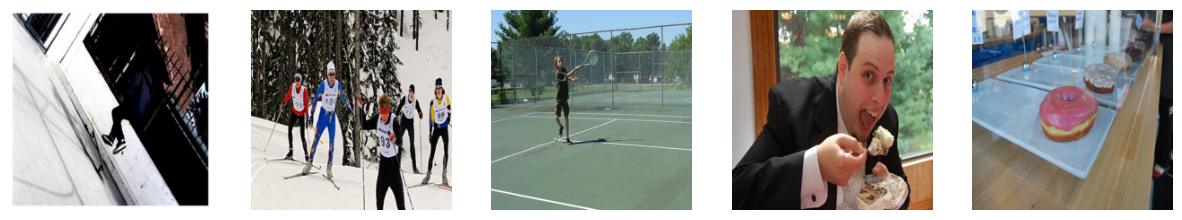

In [ ]:
# Visualizza alcune immagini per verificare il caricamento
def display_images(images, num=5):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Visualizza alcune immagini di addestramento
display_images(train_images)

# Visualizza alcune immagini di validazione
display_images(valid_images)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory delle immagini di test
test_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie1'
person_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/person'
object_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/object'

# Utilizza ImageDataGenerator con flow per array di immagini
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Usa una parte dei dati per la validazione
)

# Genera i dati per l'addestramento
train_generator = datagen.flow(
    train_images,
    train_labels,
    batch_size=32
)

# Genera i dati per la validazione
validation_generator = datagen.flow(
    valid_images,
    valid_labels,
    batch_size=32
)


In [ ]:
# Addestramento del modello
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,
    validation_data=validation_generator,
    validation_steps=len(valid_images) // 32,
    epochs=10
)

Epoch 1/10
116/116 [==============================] - 72s 569ms/step - loss: 0.0060 - accuracy: 0.9965 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
116/116 [==============================] - 57s 492ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
116/116 [==============================] - 67s 576ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
116/116 [==============================] - 70s 602ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
116/116 [==============================] - 57s 495ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
116/116 [==============================] - 67s 580ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
116/116 [==============================] - 58s 496ms/step - loss: 0.0000e+0

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

32/32 - 12s - loss: 0.0000e+00 - accuracy: 1.0000 - 12s/epoch - 387ms/step
Test accuracy: 1.0


In [ ]:
# Directory delle immagini di test
test_images_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie1'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import os

# Directory delle immagini di test
test_images_dir = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie1'

# Funzione per caricare e pre-processare un'immagine
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Funzione per classificare l'immagine
def classify_image(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

# Carica le immagini dalla directory
def load_images_from_directory(directory_path):
    image_paths = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.endswith(('.jpg', '.JPG', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Funzione per visualizzare i risultati della classificazione
def display_result(image_path, result):
    print(f'Predictions for {image_path}:')
    for pred in result:
        print(f'{pred[1]}: {pred[2] * 100:.2f}%')


# Carica le immagini
image_paths = load_images_from_directory(test_images_dir)

# Prendere alcune immagini a caso e classificarle
num_samples = min(5, len(image_paths))  # Assicurati di non chiedere più campioni di quanti disponibili
sample_images = random.sample(image_paths, num_samples)
for img_path in sample_images:
    result = classify_image(img_path, model)
    display_result(img_path, result)



35363/35363 [==============================] - 0s 1us/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie1/86.JPG:
swing: 51.25%
shovel: 7.47%
hook: 6.06%
1/1 [==============================] - 0s 18ms/step
Predictions for /content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie1/48.JPG:
rocking_chair: 30.57%
cradle: 15.35%
dining_table: 11.40%


In [ ]:
# Creare le cartelle se inesistente. Eseguire solo la prima volata!!!
#os.makedirs(person_dir, exist_ok=True)
#os.makedirs(object_dir, exist_ok=True)


# Directory delle immagini di test
test_images_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie1'
person_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/person'
object_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/object'

def classify_and_move_image(img_path, model, person_dir, object_dir):
    predictions = classify_image(img_path, model)
    if is_person(predictions):
        shutil.move(img_path, os.path.join(person_dir, os.path.basename(img_path)))
        return 'Person'
    else:
        shutil.move(img_path, os.path.join(object_dir, os.path.basename(img_path)))
        return 'Object'